In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from matplotlib.cm import rainbow
import collections
from tqdm import tqdm_notebook as tqdm
import scipy.stats as sps
import pickle

import tensorflow as tf
import tensorflow_probability as tfp
from IPython.display import clear_output

%matplotlib inline


tfd = tfp.distributions


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
from basic_solutions import *

In [113]:
def pceudo_cc_solution(train, val, L, m=1./5):
    #m = 1./5#(train /  L).mean()
    #sq_std = ((train + val) / 2. / L).std() ** 2
    #sum_ab = m * (1 - m) / sq_std - 1
    sum_ab = 10 * L - L + 2
    if m * sum_ab < 1:
        print (m * sum_ab)
        return stupid_solution(train, val, L)
    print (m * sum_ab, sum_ab * (1 - m))
    return bayesian_solve(m * sum_ab, sum_ab * (1 - m), train + val, 2 * L)

[ 26473  45818  24890  86027   7767  36089   9339  16166  10844  83725
   2824  19677 122522  23259 186663 151467  67371  39798  70337 242345]
3.64 178.35999999999999
-4841257.387380746
-4129603.3453587387


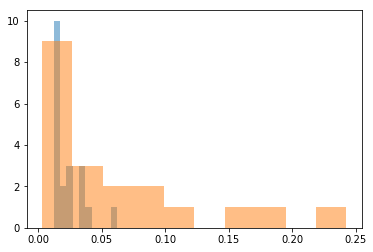

3.64 178.35999999999999
[ 32298  17636   8848  49443   8178 117124 138078  16561  32815    342
  43092  73339 124069  32802  11610  20297 105549   2193  15660  76146]
12.069473684210527 169.93052631578948
-3687642.5218923567
-3344943.885323002


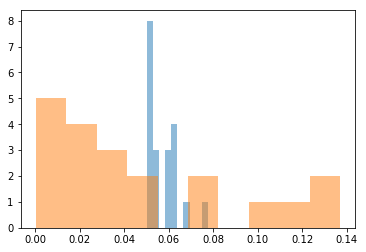

12.069473684210527 169.93052631578948
[220844  35413  71931  28640  26415   5222 142412  40841  71585  99700
  61316 165892  20679  10183  34769   6932  54251  80754  35094  71385]
20.498947368421053 161.50105263157894
-4812005.853022275
-4316826.094984924


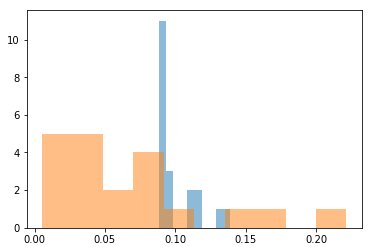

20.498947368421053 161.50105263157894
[ 18147  25507  85096  52012  87947    945 149374  11865  72783  56993
  12208 120185  20248 321606  54943   1398  13287 101464   6880  13584]
28.92842105263158 153.07157894736844
-5096328.429774861
-3871244.605346789


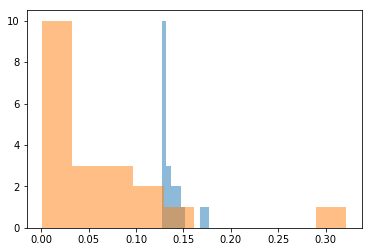

28.92842105263158 153.07157894736844
[ 26275  11852 141118  39352 116852  21355 101682  12487   5735  23005
  49329  23269  40432  31915  59728  59057  33830  37962   2574  23977]
37.357894736842105 144.6421052631579
-5090112.569873498
-3271927.2962187966


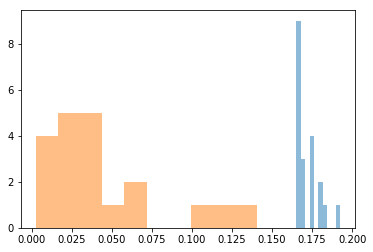

37.357894736842105 144.6421052631579
[ 30399  27731 306261  70840  78679 105780 145881 205689  46651 180738
  92952  40225  34173  75113  82077  97014   6240  35957  58263  17913]
45.78736842105263 136.21263157894737
-7084511.73686427
-5333269.093977229


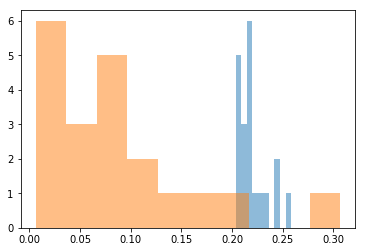

45.78736842105263 136.21263157894737
[200367  58192  54786  35120  15727 187711  73769 246000  89631  26389
  61198   4387   2221 100142  42294  93080  27571 133682  72078  32239]
54.21684210526317 127.78315789473683
-7501897.391025238
-4901332.729184073


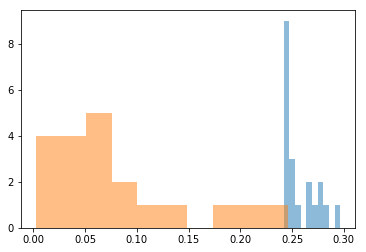

54.21684210526317 127.78315789473683
[  6548  13709   8344  33851  62642  47187  18309 104921  35667 115359
  15997  79227  44197 144195  68355   4659  66341  65144  15643  15382]
62.64631578947369 119.35368421052631
-7626241.7003336465
-3547472.156576701


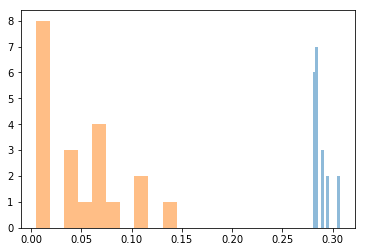

62.64631578947369 119.35368421052631
[ 30603  68480  20758   4964  37651  26192  37433  18248  25075  41516
  87037   3040  97953  30341 102534  16884  21675  55800  27905  14725]
71.07578947368421 110.92421052631579
-8447681.325870115
-3054081.337133899


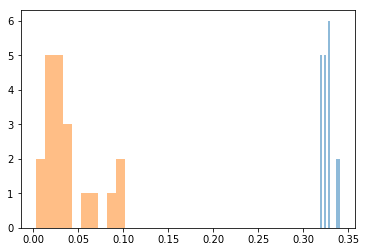

71.07578947368421 110.92421052631579
[  7172  18372  97168  33854  46007  32707   3413  38196  41764  77847
   5069  53174  60446 154158  79347 106449  50576  86722  11351  51189]
79.50526315789475 102.49473684210525
-9659795.010882769
-3836536.2367081074


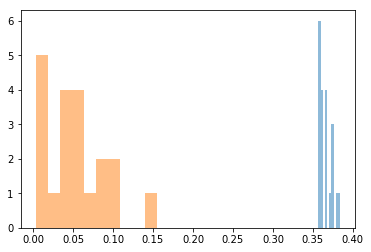

79.50526315789475 102.49473684210525
[ 46256 168962  11959  36760  74072  73788 112359  77227  97407  21478
  31456  41663  15751  17885  23104  29560  65455  65931  26427  41640]
87.93473684210527 94.06526315789473
-10854320.88741103
-3944411.978019474


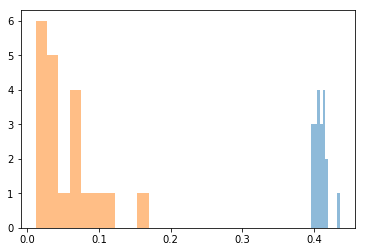

87.93473684210527 94.06526315789473
[162583   1421 121427  19336  31311  24966   6269  11058 126041  39077
  74513  10339  64670  84434  34763  78603 100674   7923 105014  60726]
96.36421052631579 85.63578947368421
-12043135.97134319
-4034367.2478041733


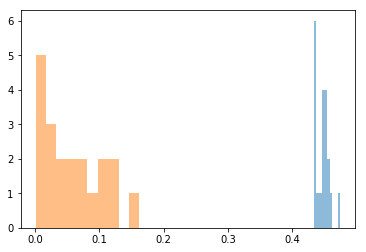

96.36421052631579 85.63578947368421
[ 13355  15925  40491 142682   5531 102219  15484  39584   2783  32305
  37535 103890  47999 195143  79515  13571  21509  22367  18344   5998]
104.79368421052634 77.20631578947366
-13162698.484636355
-3372798.8903049566


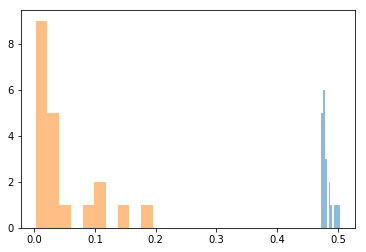

104.79368421052634 77.20631578947366
[140502  25745 198568  40964  17867  16236   6185   8120  14821  21692
 244168  71951  53301   7120  52317  10735  56876 170681  19603  32919]
113.22315789473686 68.77684210526314
-14578479.56210784
-3880054.5321638407


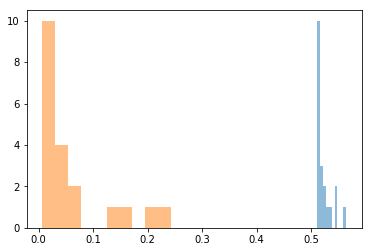

113.22315789473686 68.77684210526314
[17024  6316 19044 45491 62065 23130 54068 42184 30011 56199  6441 13393
 96536 87330 14237 28579 31903 31392  3204 50911]
121.65263157894738 60.347368421052614
-15963404.989643209
-2914502.5838115984


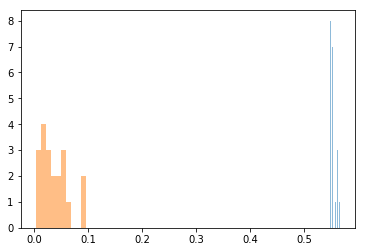

121.65263157894738 60.347368421052614
[  9335   5279  25121  83405 158929  24704  45970  28359   1227   5242
  76795  27099  22559   7707   6967 188283 303332   7757  98155 109859]
130.0821052631579 51.91789473684209
-17676511.544316825
-3801591.321831884


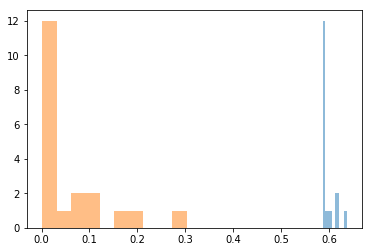

130.0821052631579 51.91789473684209
[   764   2341   6323 189380  47516  10005  56531  53393  47226  84992
  56554  28768  14787  46956  46645   1781 279807 148152  43482  39161]
138.51157894736843 43.488421052631566
-19506112.964944374
-3872550.653612005


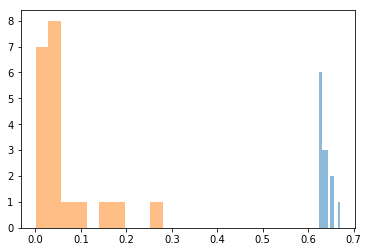

138.51157894736843 43.488421052631566
[ 48288  32787  72901  13867  90038  83608  32071  33669  37456 118423
  15248  54868  22446  14295  81623  25268  78729  14282  14363  34970]
146.94105263157897 35.058947368421045
-21698826.068336833
-3526518.860307744


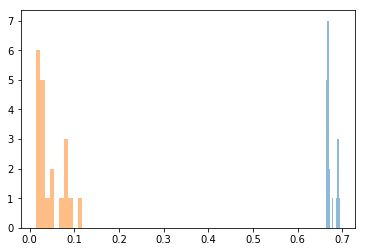

146.94105263157897 35.058947368421045
[221225  68778  50992 106172  11020  10820   1881  34672  26406  15553
   7913  29475 106485  85180  10580  80298  10347  64780  10072  72802]
155.37052631578948 26.62947368421052
-24000977.862418827
-3567926.1260103704


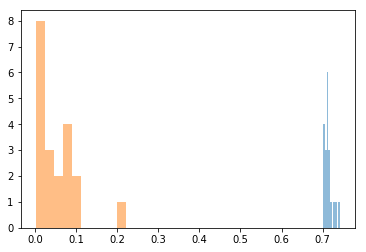

155.37052631578948 26.62947368421052
[ 37157  84240 126719  49457  88279   2412  60051 128336 103400  38078
   3722  91134  19110  69873 100391   6965   7004  12052  69623 104169]
163.8 18.199999999999996
-26556567.426467277
-4183714.38548463


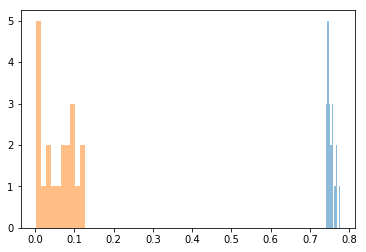

163.8 18.199999999999996


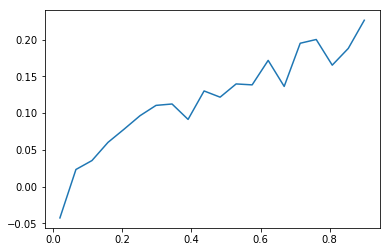

In [121]:
d = []
space = np.linspace(0.02, 0.9, 20)
for i in space:
    count = 20
    L = 20
    p = sps.beta.rvs(1.1, 20, size=count).T
    train_data = sps.binom.rvs(n=L, p=p)
    val_data = sps.binom.rvs(n=L, p=p)
    ideal = sps.binom.rvs(n=10 ** 6, p=p)
    print (ideal)
    p_pred = pceudo_cc_solution(train_data, val_data, L, i)
    print (calc_loglike(p_pred, ideal, 10 ** 6))
    print (calc_loglike(p, ideal, 10 ** 6))
    
    plt.hist(p_pred, alpha=0.5)
    plt.hist(p, alpha=0.5)
    plt.show()
    def s(train, val, L):
        return pceudo_cc_solution(train, val, L, i)
    d.append(evaluate(s, train_data, val_data, ideal, L))
plt.plot(space, d)

In [4]:
def calibration_curve_solution(train, val, L):
    #points = np.array([val[train == i].sum() / (train == i).sum() / L for i in range(L)])
    line = sps.linregress(val / L, train / L)
    tg = 1 / line.slope
    space = np.linspace(0, 0.3, 100)
    #plt.scatter(train / L, val / L)
    #plt.scatter(np.arange(L) / L, points)
    #plt.plot(space, line.slope * space + line.intercept)
    #plt.show()
    #print (tg)
    sum_ab = tg * L - L + 2
    m = ((train + val) / L).mean()
    #print (m, sum_ab)
    if m * sum_ab < 1:
        print (m * sum_ab)
        return stupid_solution(train, val, L)
    if tg < 1:
        return stupid_solution(train, val, L)
    else:
        return bayesian_solve(m * sum_ab, sum_ab * (1 - m), train + val, 2 * L)
    
def pceudo_cc_solution(train, val, L):
    m = ((train + val) / L).mean()
    #sq_std = ((train + val) / 2. / L).std() ** 2
    #sum_ab = m * (1 - m) / sq_std - 1
    sum_ab = 10 * L - L + 2
    if m * sum_ab < 1:
        print (m * sum_ab)
        return stupid_solution(train, val, L)
    return bayesian_solve(m * sum_ab, sum_ab * (1 - m), train + val, 2 * L)
    
def max_loglike_solution2(train, val, L):
    loglike = lambda x: calc_bayesian_solve_loglike(x[0], x[1], train, val, L)
    res = minimize(fun=lambda x: -loglike(1 + np.exp(x)), x0=(1, 1))
    if not res.success:
        return stupid_solution(train, val, L)
    else:
        return bayesian_solve(1 + np.exp(res.x[0]), 1 + np.exp(res.x[1]), train, L)

In [130]:
def evaluate_compare(solutions, ds, plot=False, labels=[]):
    llps = [[] for _ in solutions]
    for t_id in range(ds.train_data.shape[0]):
        for i, solution in enumerate(solutions):
            score = evaluate(solution, ds.train_data[t_id], ds.test_data[t_id], ds.ideal[t_id], ds.L)
            llps[i].append(score)
            
    if plot:
        for i, label in enumerate(labels):
            plt.hist(llps[i], bins=20, alpha=0.5, label=label)
        plt.legend()
        plt.grid()
        plt.show()

    ans = []
    for solution_scores in llps:
        sc = np.array(solution_scores)
        good = np.ones_like(sc, dtype=np.bool)
        good &= sc == sc
        good &= sc != np.inf
        good &= sc != float("-inf")
        ans.append((sc[good].mean(), good.sum()))
        
    return ans

0.9649075144508684
-2.1064285714285704
0.0456666666666666
0.364
-2.0867499999999963


/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/home/aapopovkin/dip/bachelor/basic_solutions.py:5: RuntimeWarning: invalid value encountered in true_divide
  return (train + alpha0 - 1) / (L + alpha0 + beta0 - 2)


0.091
0.9529784946236624


/home/aapopovkin/venv/lib/python3.5/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/aapopovkin/venv/lib/python3.5/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


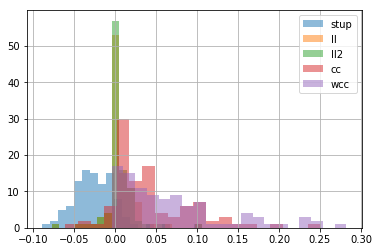

[(-0.023299178041728038, 100),
 (0.0057279524746985475, 100),
 (0.004023078970561908, 100),
 (0.04282200079426042, 99),
 (0.0688549467879349, 100)]

In [131]:
evaluate_compare([
    stupid_solution,
    max_loglike_solution,
    max_loglike_solution2,
    calibration_curve_solution,
    pceudo_cc_solution,
], data_set_big, True, [
    'stup', 'll', 'll2', 'cc', 'wcc'
])

/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/home/aapopovkin/dip/bachelor/basic_solutions.py:8: RuntimeWarning: invalid value encountered in log
  return (val * np.log(p_pred)).sum() + ((L - val) * np.log(1 - p_pred)).sum()
/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/hom

0.029027130516426577
-0.023299178041728038
0.0057279524746985475
100


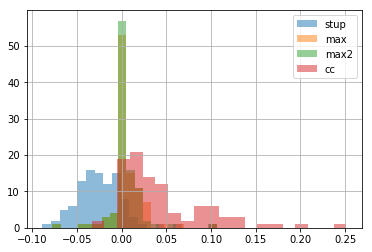

In [119]:
win = []
b = []
m = []
m2 = []
c = []
ds = data_set_big
for i in range(100):
    b_ = evaluate(stupid_solution, ds.train_data[i], ds.test_data[i], ds.ideal[i], ds.L)
    m_ = evaluate(max_loglike_solution, ds.train_data[i], ds.test_data[i], ds.ideal[i], ds.L)
    m2_ = evaluate(max_loglike_solution2, ds.train_data[i], ds.test_data[i], ds.ideal[i], ds.L)
    c_ = evaluate(calibration_curve_solution, ds.train_data[i], ds.test_data[i], ds.ideal[i], ds.L)
    if b_ == float('inf'):
        continue
    #print (b, m)
    b.append(b_)
    m.append(m_)
    m2.append(m2_)
    c.append(c_)
    win.append(m_ - b_)
print (np.mean(win))
print (np.mean(b))
print (np.mean(m))
print (len(m))
plt.hist(b, bins=20, alpha=0.5, label='stup')
plt.hist(m, bins=20, alpha=0.5, label='max')
plt.hist(m2, bins=20, alpha=0.5, label='max2')
plt.hist(c, bins=20, alpha=0.5, label='cc')
plt.legend()
plt.grid()
plt.show()

In [62]:
loglike = lambda x: calc_bayesian_solve_loglike(x[0], x[1], data_set_small, 0)

In [ ]:
data_set_small.alpha0[0], data_set_small.beta0[0]

In [ ]:
plt.figure(figsize=(17, 6))
for i in np.linspace(1, 2, 5):
    space = np.linspace(1, 20, 100)
    plt.plot(space, [loglike((i, s)) for s in space], label=str(i))
    
plt.grid()
plt.legend()
plt.show()

In [ ]:
max([
        loglike((x, y)) for x in np.linspace(1, 2, 100) for y in np.linspace(1, 30, 200)
])

In [ ]:
minimize(fun=lambda x: -loglike(x), x0=(1, 1))

In [ ]:
def formulae(train, val, L):
    return L * val.shape[0] / val.sum() - 1, L * val.shape[0] / (L * val.shape[0] - val.sum()) - 1
    return U1

for i in range(10):
    a = formulae(data_set_small.train_data[i], data_set_small.val_data[i], data_set_small.L)
    print (a[0] * a[1])

In [ ]:
for i in range(10):
    res = minimize(fun=lambda x: -calc_bayesian_solve_loglike(1 + np.exp(x[0]), 1 + np.exp(x[1]), data_set_small, i), x0=(1.1, 2.1))
    print (1 + np.exp(res.x), res.success)
    print(data_set_small.alpha0[i], data_set_small.beta0[i])
    print (-res.fun)
    print (max([
        calc_bayesian_solve_loglike(1 + np.exp(x), 1 + np.exp(y), data_set_small, i)
        for x in np.linspace(1, 5, 30) for y in np.linspace(1, 200, 1000)
    ]))